<a href="https://colab.research.google.com/github/bhavya1234/Exit-test-ICTA/blob/main/Exit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exit Exam coding
_____________________
* The dataset is added inside
* Coding needs to be done on your local machines
* Do EDA, preprocessing, modeling and fine tuning on the dataset
* Give detailed description for each step
* Upload the .ipynb file in GitHub repository as public
* Make sure that output of all cells is visible before uploading in GitHub.
* Share the repository link in Paatshala.
________________________________________________________________


##1. Exploratory Data Analysis (EDA)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\Gokul\Downloads\train (2).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [4]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [5]:
data.isnull().sum()# Check for missing values


player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [6]:
# Unique values in categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(column, data[column].nunique())


player_id 13994
name 13994
gender 2
country 163
height 31
weight 88
strong_foot 4
dedication_level 3
coaching 4


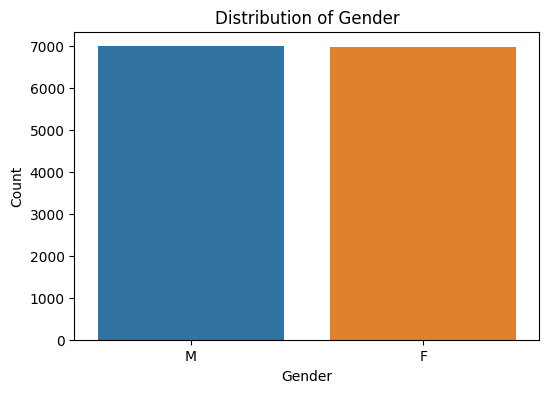

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

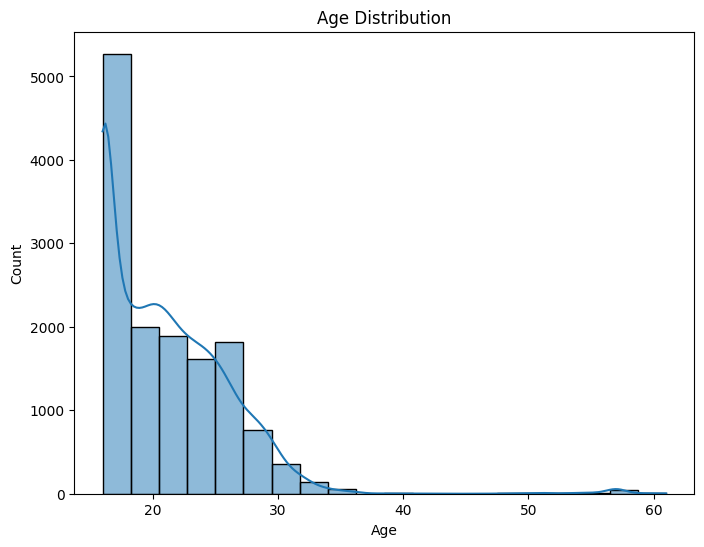

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-15-08d5f3e45924>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


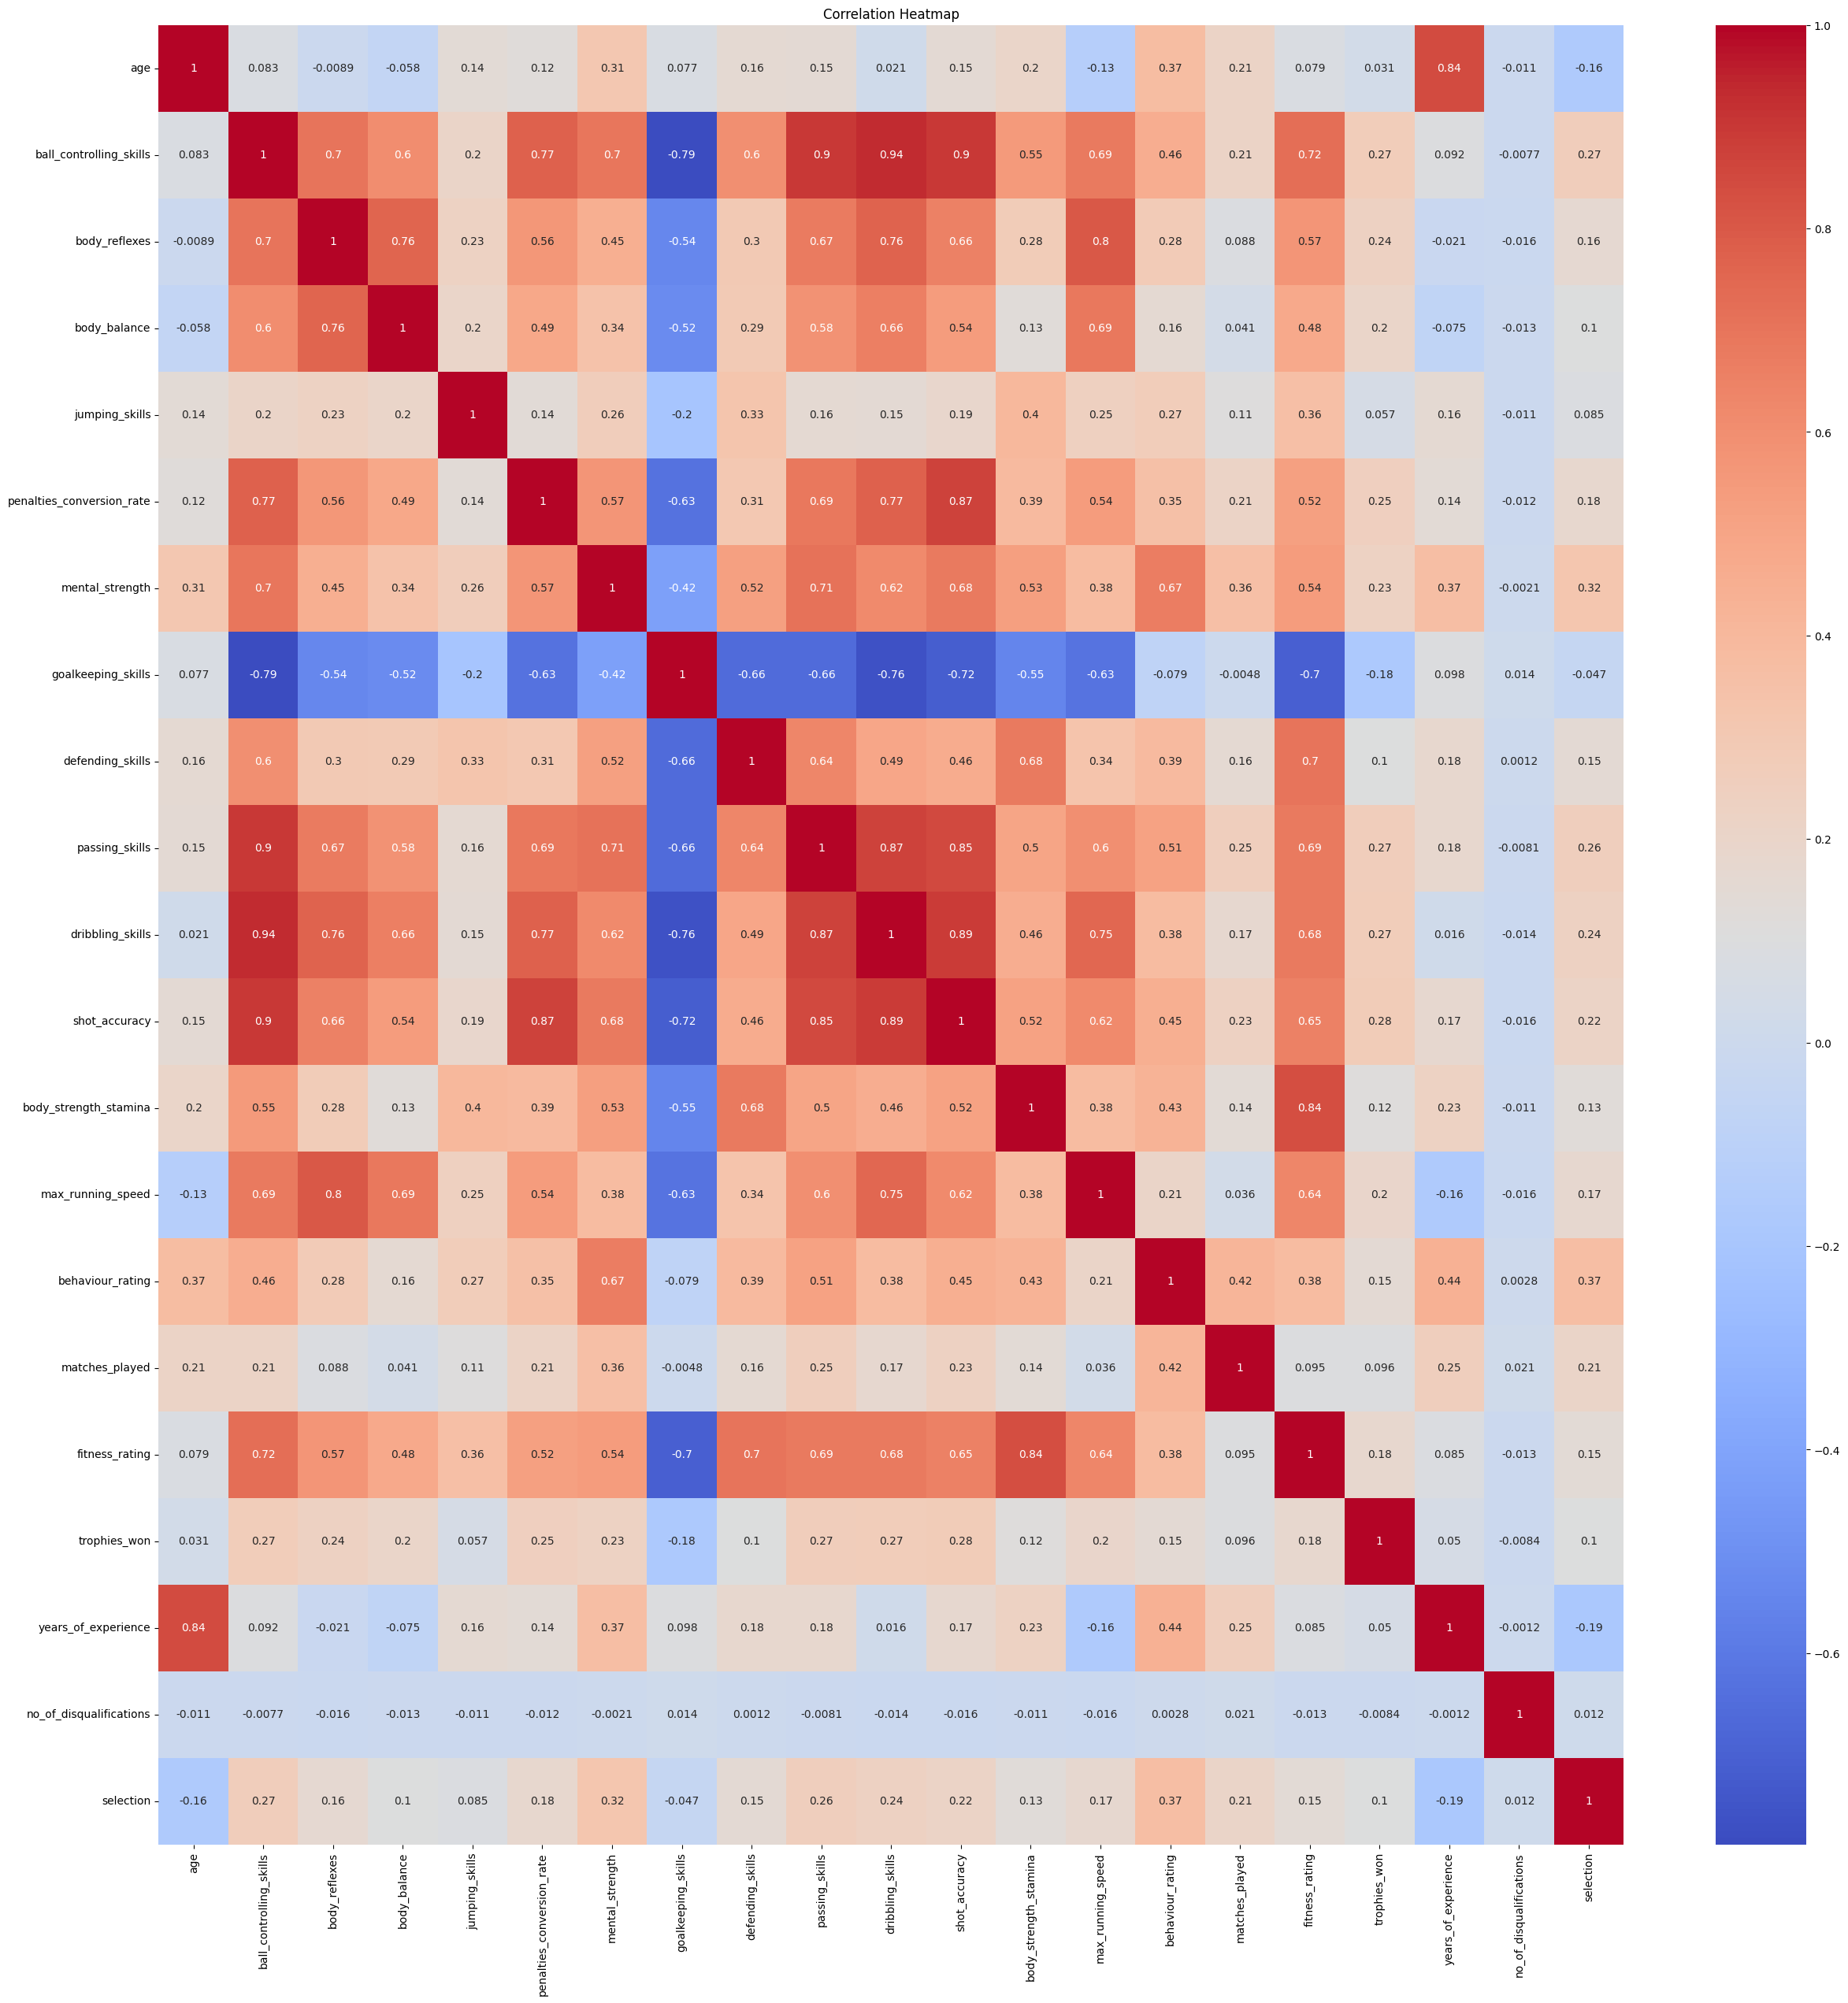

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

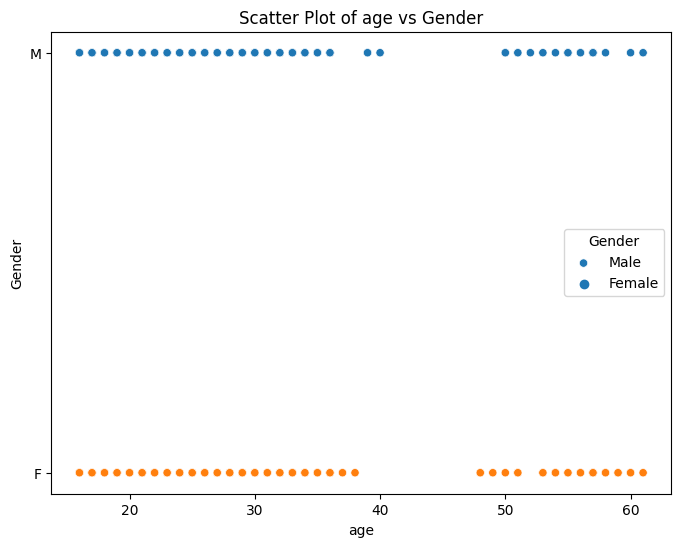

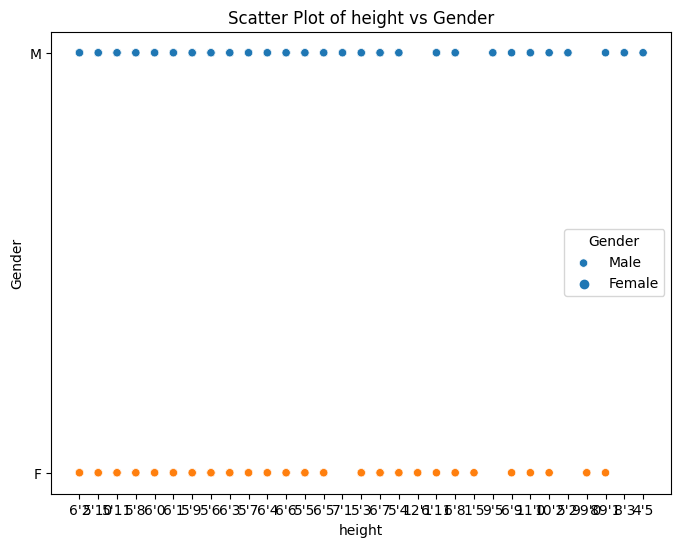

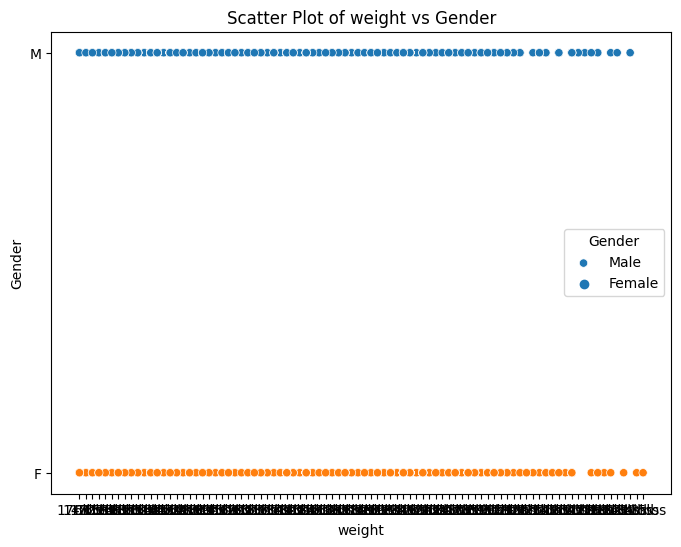

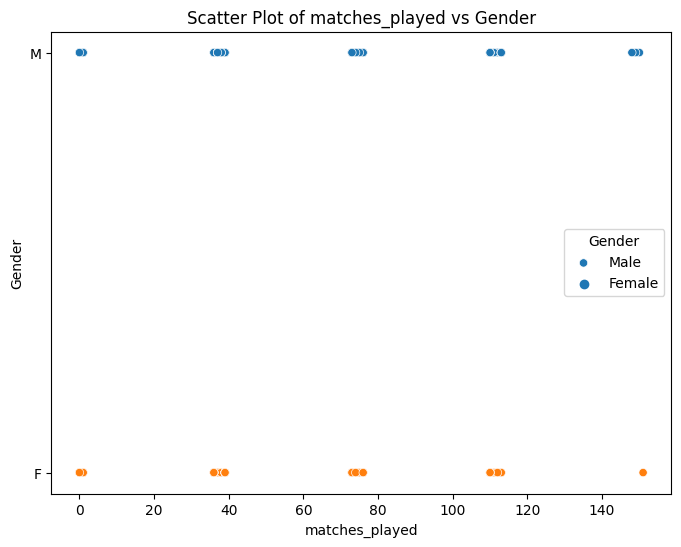

In [12]:
numerical_vars = ['age', 'height', 'weight', 'matches_played']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='gender', data=data, hue='gender')
    plt.title(f'Scatter Plot of {var} vs Gender')
    plt.xlabel(var)
    plt.ylabel('Gender')
    plt.legend(title='Gender', labels=['Male', 'Female'])  # Assuming 0 is Male and 1 is Female
    plt.show()

##2 .Preprocessing


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [32]:
imputer = SimpleImputer(strategy='mean')# Handling missing values in 'weight'
data['weight'] = imputer.fit_transform(data['weight'].values.reshape(-1, 1))

In [33]:
data.fillna(data.mean(), inplace=True)# Handling missing values in other columns

<ipython-input-33-eba2052d9d2d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [34]:
encoder = LabelEncoder()# Encoding categorical variables
categorical_columns = ['gender', 'country', 'strong_foot', 'dedication_level', 'coaching']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

In [35]:
scaler = StandardScaler()# Scaling numerical features
numerical_columns = ['age', 'height', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


### Split the data into features and target

In [36]:
X = data.drop(columns=['player_id', 'name', 'selection'])
y = data['selection']

##3. Modeling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Split the data into training and testing sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Create a Random Forest classifier

In [39]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### Train the classifier on the training data

In [40]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict on the test data

In [41]:
y_pred = classifier.predict(X_test)

### Evaluate the model's performance

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8456591639871383


### Generate a classification report

In [43]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1286
           1       0.84      0.88      0.86      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.84      0.84      2799
weighted avg       0.85      0.85      0.85      2799



In [ ]:
pip install optuna

##4. Fine-Tuning

In [50]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [57]:
def objective(trial):
    # Define parameter search space
    n_estimators = trial.suggest_categorical('n_estimators', [50, 100, 200])
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20])
    min_samples_split = trial.suggest_categorical('min_samples_split', [2, 5, 10])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2, 4])

    # Create and train the Random Forest classifier
    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    classifier.fit(X, y)
    # Predict on the entire dataset
    y_pred = classifier.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    return accuracy

In [58]:
# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2023-08-20 06:42:54,213] A new study created in memory with name: no-name-ebdf4f8e-bb08-4eaf-abac-85015aad2880
[I 2023-08-20 06:43:10,338] Trial 1 finished with value: 0.9031727883378591 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9031727883378591.
[I 2023-08-20 06:43:19,319] Trial 0 finished with value: 0.9990710304416178 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9990710304416178.
[I 2023-08-20 06:43:34,919] Trial 2 finished with value: 0.9943547234529084 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9990710304416178.
[I 2023-08-20 06:43:35,508] Trial 3 finished with value: 0.9043875946834358 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with v

In [59]:
# Get the best parameters from the study
best_params = study.best_params
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [60]:
# Train the classifier with the best parameters on the entire dataset
best_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

Analysis has resulted in a well-preprocessed dataset and an optimized Random Forest model, built and trained a Random Forest classifier using the preprocessed dataset. The model was trained to predict the 'selection' label, which indicates whether a player was selected or not. Using the optuna library, I performed hyperparameter optimization for the Random Forest classifier to maximize its accuracy. The optimized hyperparameters were found to be n_estimators=100, max_depth=None, min_samples_split=2, and min_samples_leaf=1.